In [1]:
from folktables import ACSDataSource, ACSEmployment

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)

#### The code below is from folktables github (slightly edited with calling more functions)

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

###### Your favorite learning algorithm here #####
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

yhat = model.predict(X_test)

white_tpr = np.mean(yhat[(y_test == 1) & (group_test == 1)])
black_tpr = np.mean(yhat[(y_test == 1) & (group_test == 2)])

# Equality of opportunity violation: 0.0455
white_tpr - black_tpr

0.04549392964278809

In [3]:
acs_tx = data_source.get_data(states=["TX"], download=True)
tx_features, tx_label, tx_group = ACSEmployment.df_to_numpy(acs_tx)

features, label, group = ACSEmployment.df_to_numpy(acs_tx)
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    tx_features, tx_label, tx_group, test_size=0.2, random_state=0)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

yhat = model.predict(X_test)
white_tpr = np.mean(yhat[(y_test == 1) & (group_test == 1)])
black_tpr = np.mean(yhat[(y_test == 1) & (group_test == 2)])

# Equality of opportunity violation: 0.0397
white_tpr - black_tpr

0.03974373141377996

In [4]:
from folktables import ACSDataSource, ACSIncome
from sklearn.linear_model import LogisticRegression

data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
ca_data = data_source.get_data(states=["CA"], download=True)
mi_data = data_source.get_data(states=["MI"], download=True)
ca_features, ca_labels, _ = ACSIncome.df_to_numpy(ca_data)
mi_features, mi_labels, _ = ACSIncome.df_to_numpy(mi_data)

# Plug-in your method for tabular datasets
model = LogisticRegression()

# Train on CA data
model.fit(ca_features, ca_labels)

# Test on MI data
model.score(mi_features, mi_labels)

C:\Users\naila\anaconda3\envs\fresh\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7134258518637018

#### Here linear regression begins

In [5]:
import pandas as pd

In [6]:
table = pd.read_csv("C:/Users/naila/folktables/adult_reconstruction.csv")

In [7]:
table.rename(columns={'education-num': 'education_num'}, inplace=True)
processed_table =table.head()
processed_table

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education_num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


In [8]:
linear_df = table[['education_num','income']].copy()
linear_df.head()

,education_num,income
0,13,49100
1,10,11500
2,7,2600
3,9,38997
4,13,41400


In [9]:
#making a dataframe with random sample of the linear_df rows, 1% of the data
random=linear_df.sample(frac = 0.99)

linear_training=linear_df.loc[~linear_df.index.isin(random.index)]

print("size of training",len(linear_training))
linear_training

size of training 495


,education_num,income
93,9,48000
239,9,22854
544,10,22600
585,9,22038
616,9,93044
...,...,...
48940,14,70630
49038,13,4687
49155,9,34314
49208,14,81200


In [10]:
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.formula.api import ols

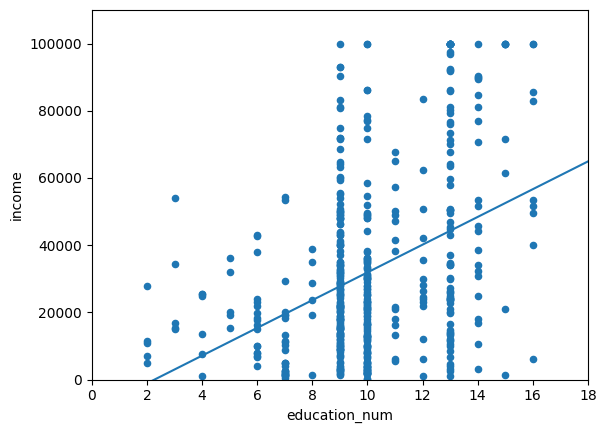

In [11]:
what = ols("income ~ education_num", linear_training).fit()
ax = linear_training.plot(x='education_num',y='income', kind ='scatter')
ax.axis(xmin=0,xmax=18,ymin=0,ymax=110000)
figure = abline_plot(model_results=what, ax=ax)


In [12]:
what.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     92.26
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           3.87e-20
Time:                        19:16:12   Log-Likelihood:                -5705.9
No. Observations:                 495   AIC:                         1.142e+04
Df Residuals:                     493   BIC:                         1.142e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9377.4250   4446.335     -2.109      0.035   -1.81e+04    -641.322
education_num  4127.4649    429.722      9.605      0.000    3283.153    4971.777
==============================================================================
Omnibus:                       38.303   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.007
Skew:                           0.746   Prob(JB):                     1.02e-10
Kurtosis:                       2.938   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### And now non-linear, using XGBoost

In [13]:
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

1.6.2


In [16]:
model = XGBRegressor()
#model evaluation method
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

scores = cross_val_score(model,linear_training['education_num'],linear_training['income'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores=np.absolute(scores)
print(scores)
print('Mean MAE(Mean Absolute Error): %.3f (%.3f)' % (scores.mean(), scores.std()) )

[20549.10060547 20282.61496094 18444.82417969 16212.27617188
 18323.08902344 19949.13490513 16948.03842474 20010.19300064
 18673.91396285 20638.37946429 16403.12914062 24058.20240234
 18833.75982422 19296.32910156 21453.79310547 16741.71121652
 18933.41214923 18658.33655533 19881.57009327 18212.92522321
 21746.79894531 21363.139375   17459.62074219 19204.66441406
 16759.05734375 17558.34901148 22268.32344149 18795.59514509
 19236.83868782 15874.78844467]
Mean MAE(Mean Absolute Error): 19092.397 (1910.701)


References:
1. https://machinelearningmastery.com/xgboost-for-regression/
2. https://www.youtube.com/watch?v=sxfpzUF6FLA
